In [ ]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  

In [ ]:
data = loadmat('ex8data1.mat')  
X = data['X']
print(X.shape)
print(data.keys())
print(data['__header__'])

(307, 2)
dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])
b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec  1 15:37:10 2011'


Text(0.5, 1.0, 'Data visualisation')

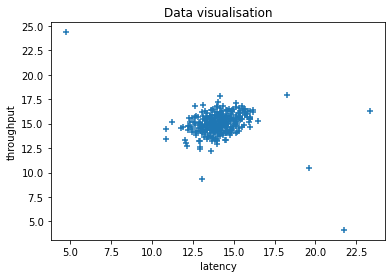

In [ ]:
plt.scatter(X.T[0],X.T[1], marker="+")
plt.xlabel('latency')
plt.ylabel('throughput')
plt.title('Data visualisation')

(array([  1.,   0.,   0.,   8., 142., 142.,  10.,   2.,   0.,   2.]),
 array([ 4.75261282,  6.61133829,  8.47006376, 10.32878923, 12.1875147 ,
        14.04624018, 15.90496565, 17.76369112, 19.62241659, 21.48114206,
        23.33986753]),
 <a list of 10 Patch objects>)

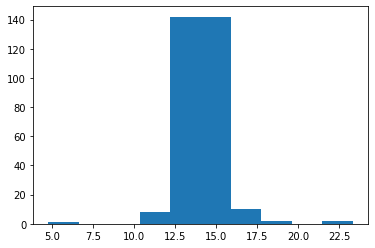

In [ ]:
plt.hist(X.T[0])

(array([  1.,   0.,   1.,   2.,  53., 219.,  30.,   0.,   0.,   1.]),
 array([ 4.12623222,  6.14864973,  8.17106723, 10.19348473, 12.21590223,
        14.23831974, 16.26073724, 18.28315474, 20.30557224, 22.32798975,
        24.35040725]),
 <a list of 10 Patch objects>)

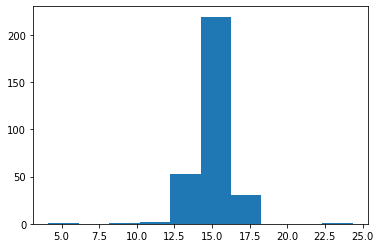

In [ ]:
plt.hist(X.T[1])

In [ ]:
def estimate_gaussian(X):
  mu = np.mean(X.T, axis=1)
  sigma = np.var(X.T, axis=1)
  return mu, sigma

In [ ]:
gauss = estimate_gaussian(X)
x1_mean = gauss[0][0]
x1_var = gauss[1][0]
x2_mean = gauss[0][1]
x2_var = gauss[1][1]

In [ ]:
Xval = data['Xval']  
yval = data['yval']
(Xval.shape)

(307, 2)

In [ ]:
from scipy import stats
p_X1 = np.zeros((X.shape[0]))
p_X2 = np.zeros((X.shape[0]))
p_X1 = stats.norm.pdf(X[:,0], loc=x1_mean, scale=np.sqrt(x1_var))
p_X2 = stats.norm.pdf(X[:,1], loc=x2_mean, scale=np.sqrt(x2_var))

P = stats.norm.pdf(X, loc=np.array([x1_mean, x2_mean]).T, scale=np.array([np.sqrt(x1_var), np.sqrt(x1_var)]).T)

In [ ]:
p_X1

array([2.16209766e-01, 2.57452082e-01, 2.94132233e-01, 2.47211916e-01,
       2.72515466e-01, 2.91811896e-01, 1.87139581e-01, 1.51176483e-01,
       9.35633051e-02, 1.66608997e-01, 2.93387080e-01, 2.94487687e-01,
       2.55592373e-01, 2.55956210e-01, 2.93271402e-01, 2.94445597e-01,
       2.92880166e-01, 2.85183307e-01, 2.77277592e-01, 9.48976543e-02,
       2.70272714e-01, 2.93421614e-01, 2.41105554e-01, 2.93042880e-01,
       1.96077288e-01, 1.56529793e-01, 2.75904586e-01, 2.57496215e-01,
       2.76670469e-01, 2.83495304e-01, 1.70682832e-01, 2.93186130e-01,
       2.04326372e-01, 1.95772970e-01, 1.08970523e-01, 2.45951257e-01,
       1.40637462e-01, 2.94633744e-01, 2.80527513e-01, 2.93718568e-01,
       2.81681579e-01, 2.25242931e-01, 2.82189416e-01, 2.94296621e-01,
       2.66749616e-01, 2.88560129e-01, 1.11371039e-01, 2.94677206e-01,
       2.89041960e-01, 1.85565845e-01, 2.40902893e-01, 2.79275320e-01,
       2.85710057e-01, 2.94679955e-01, 2.79865441e-01, 2.94563913e-01,
      

In [ ]:
P

array([[2.16209766e-01, 2.89449826e-01],
       [2.57452082e-01, 1.94452365e-01],
       [2.94132233e-01, 2.41356205e-01],
       [2.47211916e-01, 2.02000055e-01],
       [2.72515466e-01, 2.29794021e-01],
       [2.91811896e-01, 1.47690195e-01],
       [1.87139581e-01, 2.50202989e-01],
       [1.51176483e-01, 2.36960321e-01],
       [9.35633051e-02, 1.98262660e-01],
       [1.66608997e-01, 2.93913767e-01],
       [2.93387080e-01, 9.47133682e-02],
       [2.94487687e-01, 2.78949230e-01],
       [2.55592373e-01, 2.70171764e-01],
       [2.55956210e-01, 2.64515977e-01],
       [2.93271402e-01, 1.31830704e-01],
       [2.94445597e-01, 2.72805606e-01],
       [2.92880166e-01, 2.89873577e-01],
       [2.85183307e-01, 2.94272799e-01],
       [2.77277592e-01, 2.44230301e-01],
       [9.48976543e-02, 1.06595131e-01],
       [2.70272714e-01, 2.72112515e-01],
       [2.93421614e-01, 2.91172086e-01],
       [2.41105554e-01, 1.56819705e-01],
       [2.93042880e-01, 2.87707686e-01],
       [1.960772

In [ ]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))
pval[:,0] = stats.norm.pdf(Xval[:,0], loc=x1_mean, scale=np.sqrt(x1_var))
pval[:,1] = stats.norm.pdf(Xval[:,1], loc=x2_mean, scale=np.sqrt(x2_var))

In [ ]:
print(pval[:,1].min())
print(pval[:,1].max())
pval[:10, 1]

5.810923665605239e-13
0.30510142489030334


array([0.30457725, 0.29540963, 0.16132253, 0.22661829, 0.27090007,
       0.20830726, 0.30231612, 0.28875122, 0.26524155, 0.30426236])

In [ ]:
from sklearn.metrics import f1_score
def select_threshold(pval, yval):
  bf1 = 0
  bthres = 0
  for tres in np.linspace(pval.min(), pval.max(), 10000).tolist():
    t = pval <= tres
    y = np.logical_or(t[:,0],t[:,1])
    f1 = f1_score(yval, y)
    if f1 > bf1:
      bf1 = f1
      bthres = tres
  return bthres, bf1

In [ ]:
best_epsilon, best_f1 = select_threshold(pval, yval)
best_epsilon, best_f1

(0.0003966715195093453, 0.8750000000000001)

In [ ]:
t1 = p_X1 < best_epsilon
t2 = p_X2 < best_epsilon
y = np.logical_or(t1,t2).astype(int)
anomalies = np.where(y == 1)
print(anomalies, y)
AN = np.zeros((anomalies[0].shape[0], 2))
for ii in range (0, anomalies[0].shape[0]):
    AN[ii, 0] = X[anomalies[0][ii], 0]
    AN[ii, 1] = X[anomalies[0][ii], 1]

(array([300, 301, 303, 304, 306]),) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 1 0 1]


Text(0.5, 1.0, 'Final result')

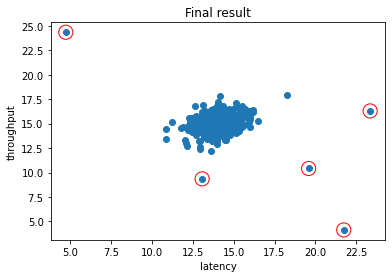

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(AN[:,0], AN[:,1], s=200, facecolors='none', edgecolors='r')
plt.xlabel('latency')
plt.ylabel('throughput')
plt.title('Final result')